Convolution : filter the image

In [1]:
import tensorflow as tf
from keras.preprocessing import image

2022-04-26 09:16:49.019617: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-26 09:16:49.019652: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


import the dataset

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2022-04-26 09:16:50.278546: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-26 09:16:50.278581: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-26 09:16:50.278603: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dola): /proc/driver/nvidia/version does not exist
2022-04-26 09:16:50.278808: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Build the model with optimizer and loss function

In [3]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])

Training the model : To find the relation between data and labels

In [4]:
TRAINING_DIR = '/home/azureuser/data/training'
train_datagen = image.ImageDataGenerator(rescale=1.0/255.) #normalisation
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,batch_size=250,class_mode='binary',target_size=(150, 150))

VALIDATION_DIR = '/home/azureuser/data/testing'
validation_datagen = image.ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, batch_size=250,class_mode='binary',target_size=(150, 150))



Found 16272 images belonging to 2 classes.
Found 4999 images belonging to 2 classes.


In [5]:
history = model.fit(train_generator, epochs=150, steps_per_epoch=20,
                    validation_data=validation_generator, validation_steps=6)

Epoch 1/150


2022-04-26 09:16:52.174224: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 350464000 exceeds 10% of free system memory.
2022-04-26 09:16:52.991033: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 165888000 exceeds 10% of free system memory.
2022-04-26 09:16:53.868175: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 165888000 exceeds 10% of free system memory.
2022-04-26 09:16:54.668211: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 175232000 exceeds 10% of free system memory.
2022-04-26 09:16:54.668311: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 350464000 exceeds 10% of free system memory.


20/20 [==============================] - 74s 4s/step - loss: 0.7016 - acc: 0.5417 - val_loss: 0.7100 - val_acc: 0.4933
Epoch 2/150
20/20 [==============================] - 75s 4s/step - loss: 0.6852 - acc: 0.5504 - val_loss: 0.6784 - val_acc: 0.5147
Epoch 3/150
10/20 [==============>...............] - ETA: 33s - loss: 0.6694 - acc: 0.5952

/home/azureuser/.local/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


20/20 [==============================] - 75s 4s/step - loss: 0.6672 - acc: 0.5918 - val_loss: 0.6850 - val_acc: 0.5073
Epoch 4/150
20/20 [==============================] - 75s 4s/step - loss: 0.6607 - acc: 0.6062 - val_loss: 0.6761 - val_acc: 0.5240
Epoch 5/150
20/20 [==============================] - 74s 4s/step - loss: 0.6410 - acc: 0.6338 - val_loss: 0.6521 - val_acc: 0.5780
Epoch 6/150
20/20 [==============================] - 72s 4s/step - loss: 0.6308 - acc: 0.6494 - val_loss: 0.6422 - val_acc: 0.5820
Epoch 7/150
20/20 [==============================] - 76s 4s/step - loss: 0.6192 - acc: 0.6526 - val_loss: 0.6050 - val_acc: 0.6633
Epoch 8/150
20/20 [==============================] - 78s 4s/step - loss: 0.6012 - acc: 0.6746 - val_loss: 0.5997 - val_acc: 0.6727
Epoch 9/150
20/20 [==============================] - 75s 4s/step - loss: 0.5900 - acc: 0.6846 - val_loss: 0.5874 - val_acc: 0.6813
Epoch 10/150
20/20 [==============================] - 72s 4s/step - loss: 0.5929 - acc: 0.6834 

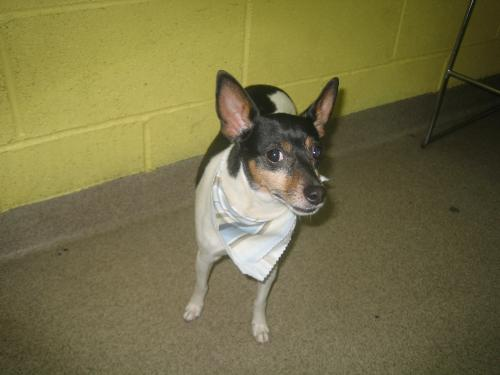

[1.]
 is a dog


In [9]:
from PIL import Image as PImage
import numpy as np

def loadImage(path):
    return PImage.open(path +"/" +"10002.jpg")

path =  "/home/azureuser/data/testing/dog"

# your images in an array
img = loadImage(path)
img.show()
rimg=img.resize((150,150))
x = np.asarray(rimg)
x = np.expand_dims(x, axis=0)
image = np.vstack([x])
classes = model.predict(image)
print(classes[0])
if classes[0]>0.5:
    print(" is a dog")
else:
    print(" is a cat")